In [42]:
import pandas as pd
import seaborn as sns

In [43]:
## Pull data from CITF github
df_vax_state = pd.read_csv("https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_state.csv",parse_dates=["date"])
df_vax_malaysia = pd.read_csv("https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_malaysia.csv",parse_dates=["date"])

In [44]:
## Set date as index
df_vax_state.set_index("date",inplace=True)
df_vax_malaysia.set_index("date",inplace=True)

In [45]:
df_vax_state["state"].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

In [46]:
## Latest data state
df_vax_state.tail(16)

,state,dose1_daily,dose2_daily,total_daily,dose1_cumul,dose2_cumul,total_cumul
date,,,,,,,
2021-07-16,Johor,13516,4368,17884,639877,371672,1011549
2021-07-16,Kedah,11383,606,11989,391610,224068,615678
2021-07-16,Kelantan,1781,407,2188,306817,202306,509123
2021-07-16,Melaka,7368,5420,12788,226428,115927,342355
2021-07-16,Negeri Sembilan,18087,4716,22803,399421,160348,559769
2021-07-16,Pahang,9030,3649,12679,309837,193194,503031
2021-07-16,Perak,18417,2151,20568,545927,296329,842256
2021-07-16,Perlis,1707,1678,3385,88243,63143,151386
2021-07-16,Pulau Pinang,17986,5726,23712,474665,207723,682388


In [47]:
# State average statistics
test_mean = df_vax_state.groupby(["state"], as_index=False).mean()
test_mean

,state,dose1_daily,dose2_daily,total_daily,dose1_cumul,dose2_cumul,total_cumul
0,Johor,4474.664336,2599.104895,7073.769231,170082.657343,90491.902098,260574.559441
1,Kedah,2738.531469,1566.909091,4305.440559,106083.503497,62360.132867,168443.636364
2,Kelantan,2145.573427,1414.727273,3560.300699,87422.314685,49893.937063,137316.251748
3,Melaka,1583.412587,810.678322,2394.090909,53765.517483,27803.160839,81568.678322
4,Negeri Sembilan,2793.153846,1121.314685,3914.468531,79356.104895,41374.216783,120730.321678
5,Pahang,2166.692308,1351.006993,3517.699301,95369.804196,57804.307692,153174.111888
6,Perak,3817.671329,2072.230769,5889.902098,146010.510490,82959.958042,228970.468531
7,Perlis,617.083916,441.559441,1058.643357,27703.937063,16538.552448,44242.489510
8,Pulau Pinang,3319.335664,1452.608392,4771.944056,110729.181818,54412.251748,165141.433566
9,Sabah,3235.727273,2446.223776,5681.951049,143757.888112,80529.741259,224287.629371


[Text(0.5, 0, 'States'), Text(0, 0.5, 'Average 2nd Dose per day')]

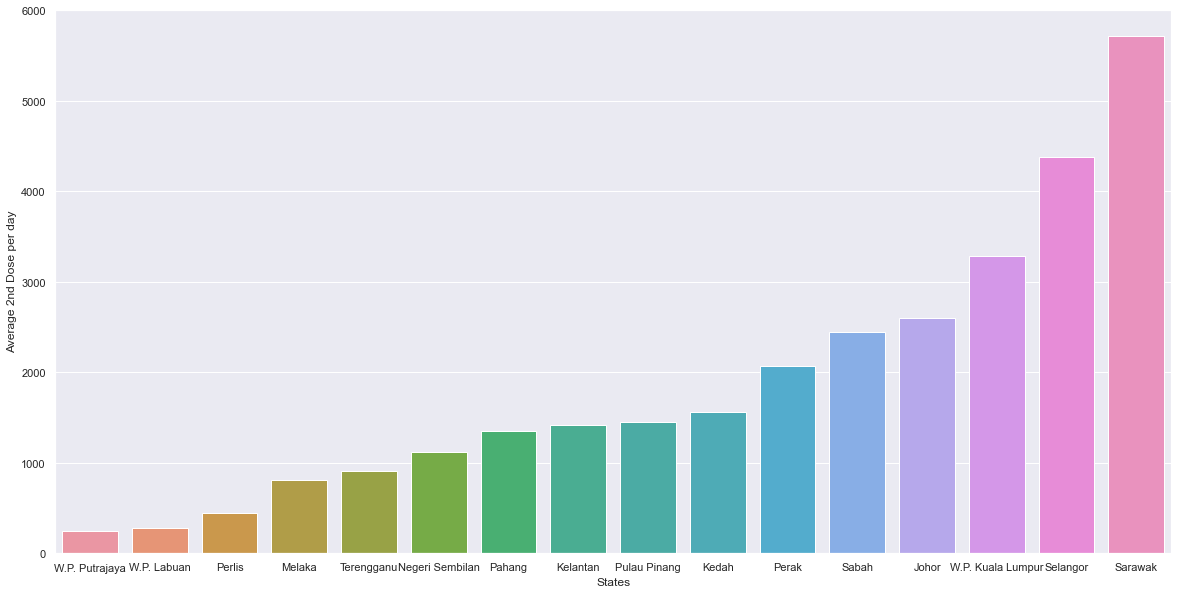

In [61]:
# Plot average 2nd Dose vaccine administration
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="state", y="dose2_daily",data=test_mean, order=test_mean.sort_values('dose2_daily').state)
ax.set(xlabel='States', ylabel='Average 2nd Dose per day')
